# Hand Digit Recognisition

> **We will be using the MNIST data and get the prediction of the hand written digit prediction.**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

## Data Overview

In [5]:
x_train[0].shape

(28, 28)

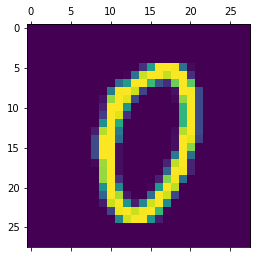

In [6]:
plt.matshow(x_train[1000])

In [7]:
y_train[1000]

0

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
x_train.ndim

3

## Scalling

In [10]:
x_train = x_train/255
x_test = x_test/255

- scalling is done to increase the accuracy of the model

##### Convert a 3D array to 1D array

In [11]:
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

In [12]:
x_train_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
x_test_flat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
x_train_flat.shape

(60000, 784)

In [15]:
x_test_flat.shape

(10000, 784)

## Model Development

### Artifitial Neural Network (ANN)

In [16]:
x_train.shape

(60000, 28, 28)

### using 'Adam' Activation function

In [37]:
model = keras.Sequential([
    # the flatten array consist of (28, 28)
    keras.layers.Flatten(input_shape = (28, 28)),
    
    # 1st hidden layer
    keras.layers.Dense(100, activation = "relu"),
    
    # 2nd hidden layer
    
    # last layer doesn't need input shape, because whatever 
    # 1st layer is connected it knows input is that
    
    # output layer
    keras.layers.Dense(10, activation = "sigmoid")
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="D:\Ritwik's Download\Deep Learning\Tensorboard\logs/adam", histogram_freq=1)

model.fit(x_train, y_train, epochs=5, callbacks=[tb_callback])



Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2764 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1272 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0912 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0690 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0547 - accuracy: 0.9833


In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9751


[0.08284970372915268, 0.9750999808311462]

### Using SGD activation function

In [38]:
model = keras.Sequential([
    # the flatten array consist of (28, 28)
    keras.layers.Flatten(input_shape = (28, 28)),
    
    # 1st hidden layer
    keras.layers.Dense(100, activation = "relu"),
    
    # 2nd hidden layer
    
    # last layer doesn't need input shape, because whatever 
    # 1st layer is connected it knows input is that
    
    # output layer
    keras.layers.Dense(10, activation = "sigmoid")
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="D:\Ritwik's Download\Deep Learning\Tensorboard\logs/sgd", histogram_freq=1)

model.fit(x_train, y_train, epochs=5, callbacks=[tb_callback])



Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2720 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1260 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0894 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0669 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0539 - accuracy: 0.9832


In [39]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9750


[0.08638440817594528, 0.9750000238418579]

## Tensorboard

In [40]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 18476), started 1:05:39 ago. (Use '!kill 18476' to kill it.)